 11월 5일 (화요일)

필요한 library 정리

In [41]:
from matplotlib import pyplot as plt     # 중요       
from mpl_toolkits.mplot3d import Axes3D                     #3D plotting할 때
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

* matplotlib: plotting할 때 쓰는 library


* 시험문제 가능 (같은 것을 고르시오)

  : 'from matopltlib import pyplot as plt' (from을 사용해 큰 library인 matplotlib에서 sub library인 pyplot을 import하는 것) 

     = 'import matplotlib.(dot) pyplot'

# 1. Phasor

In [3]:
# parameter setting(변수에 값을 달아놓는 것-> 수 바꿔줄 때 편리)
amp = 1          # range [0.0, 1.0]      / '진폭'amplitude = 1 (-1에서 1까지)
sr = 10000       # sampling rate, Hz    / 1초에 몇개의 숫자로 해서 음질상 얼마나 고해상도인지.=> "음질의 해상도" (1초에 만개의 숫자로 표현)
dur = 0.5        # in seconds           / 몇초동안 소리가 나는지      
freq = 100.0     # sine frequency, Hz   / 1초에 (태극문양)몇번 왔다갔다 하는가, '총 몇바퀴가 되어야 하는가'
                     # Hz를 높게 해주면 소리 높아져서 더 잘 들림.

- 목적 상으론 parameter, 코딩할 땐 변수

- sampling rate : 1초동안 들어갈 수 있는 time ticks / 얼마나 정보를 촘촘하게 할 것인지
                  (1초동안 점들이 얼마나 많이 나오는지)
- duration : "얼마나 길게" 할 것인지

- frequency : sine wave가 1초동안 "몇바퀴" 나오는지(shape이 몇번 반복되는지)

    (=> sr과 freq는 똑같은 단위Hz를 쓰지만 구별해야 함)

# time을 먼저 만들어야 함

# t :  0.0001  ,  0.0002  ,  0.0003    ... 0.5000     

* duration이 0.5이므로 0.5초까지.끝이 duration이 되는 것.

* time을 먼저 만들어야 함 (0.5000가 우리가 만들고자 하는 time)

* sr(sampling rate)은 해상도 같은 것(time을 얼만큼 잘게 쪼개는가). '1초'동안 총 몇개의 time ticks가 들어갈까.

  : 0.0001 -> 1초동안 총 10000개 들어감. (만약, 0.001이라면 1000개 들어가는 것)

* sr와 duration만 있으면 time을 만들어낼 수 있음
 
  : 끝이 'duration'이 되는 것/ sr(sampling rate)이 10000이므로 1초에 총 10000개가 들어가는 개념

  : amplitude진폭와 frequency의 개념은 아직 들어가 있지 않음


t = np.arange(1,sr)   

* '1에서 1999'까지 만들어짐(계산하기 위해 np사용)

t = np.arange(1,sr+1)  

* '1에서 10000'까지 만들어짐(마지막 숫자 포함시키기 위해 +1해줌)

* 만약 duration이 1초라면 1초동안 이 sr로 만들어내는 숫자가 time tick과 같을 것
  (그러나 duration이 0.5초임 )
  
  (만약 1초라면, 그 time ticks의 개수는 sr과 일치할 것
  
  /sr만큼의 time ticks를 index로 먼저 만드는 것)

t = np.arange(1,sr*dur+1)  

* sr에 duration을 곱해줌

* '1부터 5000'까지의 time tick의 'index'만 만든 것. 실제의 time은 아님.

   (time ticks의 갯수를 index로 먼저 만든다)
  

* sr에 duration을 곱하면 만개를 다 쓰지 않고 5000까지 만들어짐 -> 0.5까지 time tick을 만들어줌.(가장 마지막은 사용하지 않으므로 '+1'해줘야 함.)

  (duration이 반영되어, sr의 갯수만큼 time ticks가 만들어짐-sr을 기반으로 time ticks를 만든 것)

In [4]:
# generate time
t = np.arange(1, sr * dur+1)/sr   #sr로 나눠주기

* '1부터 5000까지 만든 것(1,sr*dur+1)'을 sr(10000)로 나누면, 진짜 time tick이 만들어지는 것.
  (time ticks의 index를 sr로 나눠주면 실제 time('초')으로 변환되는 것.) 
  

 -  '10000분의 1(0.0001)초'부터 '10000분이 5(0.5)초'까지 만들어지는 셈

 - 1/10000초, 2/10000초, 3/10000초, ... , 5000/10000(0.5)초

# ㄴ중요

In [5]:
t               #time을 만듦

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

* 실제로 time이 만들어졌는지 확인. array(일차원 벡터)로 만들어짐.

* e-0.4 = 1/10000 (10의 4승 분의 1 = 10000만분의 일), e-0.1 = 1/10(10의 1승 분의 1 = 10분의 1)

 - 1 x e-0.4 = '1/10000초',  2 x e-0.4 = '2/10000초',..., 4.998 x e-0.1 = '0.4998초',  4.999 x e-0.1 = '0.4999초',  5 x e-0.1 = '0.5초'

* time이 있어야 실체의 sound를 만들어낼 수 있음 (실제 필요한 것은 세타(θ)값,θ에 들어가는 각도값을 'phase'라고 함.)

* time을 먼저 만들고, time과 동시켜 phase를 만들어야 함.(아래의 방법)

  -> time개념과 phase개념(θ,각도)이 동시에 들어가는 것.

In [6]:
# generate phase
theta = t * 2*np.pi * freq   

* time에 2파이를 곱함 (np.pi: numpy 속에 정의되어 있는 파이 값, 그냥 '상수값 파이')

* sr을 10000으로 해서, time이 0초에서 1초까지 만들어졌다고 하면, 1초에서의 time값은 1. 여기에 2파이를 곱하면 '2파이'가 됨
 
 - '0초~ 1초'까지 있는데 2파이를 곱하면 '0파이~ 2파이'가 되는 것저 = 단순히 '1바퀴' 도는 것

* frequency('총 몇바퀴'되어야 되는가에 대한 정의)를 곱해줌. (freq가 '1'이라면 그냥 2파이만 곱한 채 '1바퀴' 도는 것)
 
  - '2파이가 1초동안 총 몇개가 있어야 되는가'-> frequency가 100이라면 '총 100바퀴를 돌아라'를 의미

# ㄴ중요

=> time먼저 만들고 phase(각도)를 연동시켜줌. 동시(시간과 각도의 개념이 동시에)에 들어가는 것

In [7]:
# generate signal by cosine-phasor
s = np.sin(theta)         #sine wave만들어 내는 것, x1이 되어있다고 생각하면 -1부터  1까지로 정의
                             # (-2부터 2까지로 만들고 싶으면 x2하면 됨. amplitude)

* np에 정의된 sin의 입력값으로 theta를 넣어줌

 
* 문제
 
 - time의 벡타(숫자의 갯수)의 size와 theta의 벡타의 size가 같은가?? 같다!! 
 
   ->'time'을 '1/10000초~5000/10000초'까지 만듦 -> 총 5000개의 time의 벡타를 만듦. 
 
   => theta는 이 time에 2파이와 freq.를 곱한것일 뿐 -> 똑같은 갯수의 벡타가 theta에 들어있는 것.

In [ ]:
(나중에) s = amp*np.sin(theta)      # amplitude를 곱함

Text(0, 0.5, 'real')

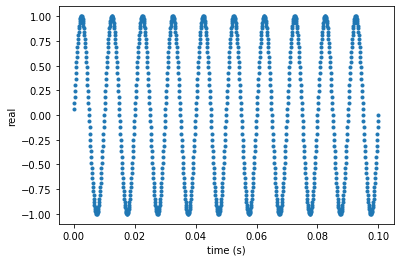

In [8]:
fig = plt.figure()                  #plt: plotting하는 함수(plt.figure함수를 fig라는 변수로 받는 것)
ax = fig.add_subplot(111)           # 그림을 만들 준비하는 것
ax.plot(t[0:1000], s[0:1000], '.')  # plot이라는 함수는 두개의 입력값('time',sin의 결과값인 's')을 받음-> x와 y로 받아 plotting. 
                                        # -> 세번째 입력값인 '.(dot)'는 점(dot)으로 plotting하라는 의미
    # (만든 'time' 5000개 중에 1000개만 plotting하라/ 's'도 1000개만 -> sin 곡선으로 나타남, 0부터 시작.)
ax.set_xlabel('time (s)')           # label을 정하는 것 -> x label은 'time'으로, y label은 'real'로 하라.
ax.set_ylabel('real')                   

In [9]:
# generate signal by complex-phasor
c = np.exp(theta*1j)        

* 오일러 phasor한 부분

* 'exp'는 오일러 공식의 'e'에 해당하는 부분

In [ ]:
(나중에) c = amp*np.exp(theta*1j)    # 똑같이 amplitude를 곱함. 위의 설정값에서 amp를 2로 변경한 후라 변함

Text(0.5, 0, 'imag')

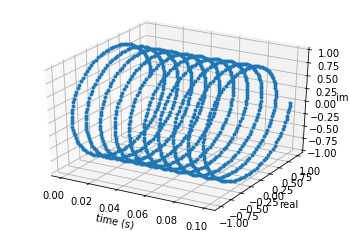

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

ㄴ> 실수(real) a와 허수(imaginary) b

In [18]:
ipd.Audio(s, rate=sr)   
# play하는 함수, 정의내린 's' 값과 'sr'값을 입력값으로 적어줘야 함.

- audio를 play하기 위해선 ipd를  import해야함(위에서 했음)

- s(벡터)와 원하는 sr값을 입력값으로 넣어줌.(s는 sin 그래프의 결과값)

- s 대신 c.imah나 c.real 넣어도 오디오 출력됨


# ----------------------------11/5일 진도---------------------

In [17]:
ipd.Audio(c.imag, rate=sr)

In [18]:
ipd.Audio(c.real, rate=sr)   # real 값의 벡타들과 sr인 10000을 넣으면ㅠ

# --------------------------------------------------------------------------------------

# -11/ 12

In [12]:
import sounddevice as sd
sd.play(c.real, sr)

- erro 뜸. sounddevice를 먼저 깔아야 함

In [15]:
!pip install sounddevice   #sounddevice 설치하는 법

ERROR: Invalid requirement: '#sounddevice'



In [16]:
# !pip install sounddevice
import sounddevice as sd
sd.play(c.real, sr)            # 실행하면 소리 남

# amplitude를 곱해 진폭 변화시키기

In [42]:
# amplitude를 '2'로 바꾸기
amp = 2          # range [0.0, 1.0]      / '진폭'amplitude = 1 (-1에서 1까지)
sr = 10000       # sampling rate, Hz    
dur = 0.5        # in seconds           / 몇초동안 소리가 나는지      
freq = 400.0  

In [43]:
# sin그래프에 amplitude곱하기

In [44]:
t = np.arange(1, sr * dur+1)/sr 

In [45]:
theta = t * 2*np.pi * freq

In [46]:
s = amp*np.sin(theta)      # amplitude를 곱함
s

array([ 4.97379774e-01,  9.63507348e-01,  1.36909421e+00, ...,
       -9.63507348e-01, -4.97379774e-01,  1.57150938e-14])

<IPython.core.display.Javascript object>


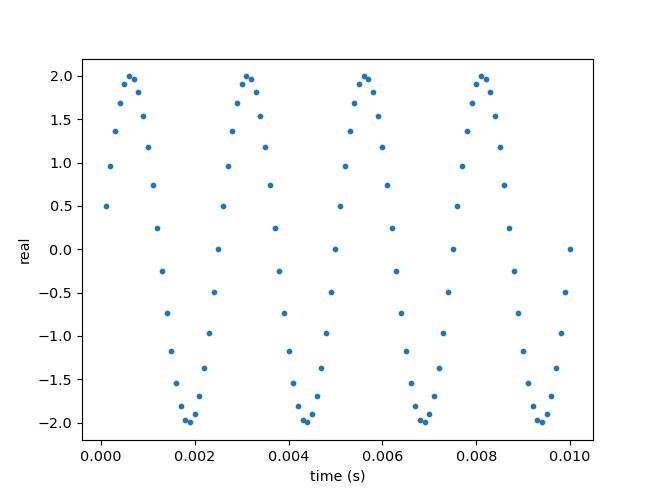

Text(0, 0.5, 'real')

In [47]:
fig = plt.figure()                  
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')         
ax.set_ylabel('real')

- 진폭이 ''-2~2'로 변화함 (amplitude:2)

In [ ]:
# complew phasor에 amplitude 곱하기

In [48]:
c = amp*np.exp(theta*1j) 
c

array([1.93716632+4.97379774e-01j, 1.75261336+9.63507348e-01j,
       1.45793725+1.36909421e+00j, ..., 1.75261336-9.63507348e-01j,
       1.93716632-4.97379774e-01j, 2.        +1.57150938e-14j])

<IPython.core.display.Javascript object>


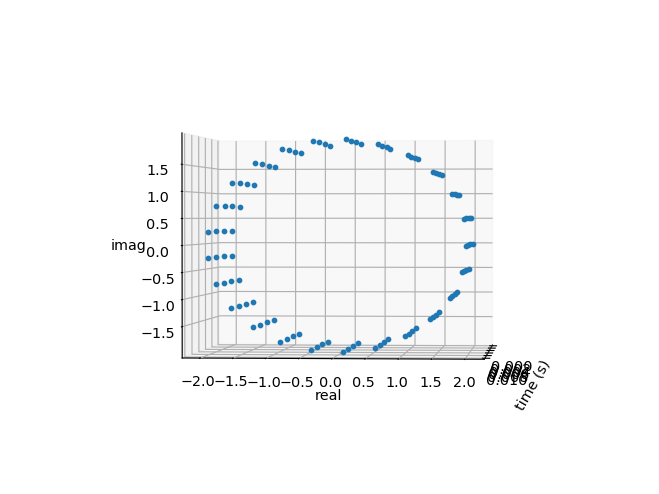

Text(0.5, 0, 'imag')

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')              
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')  
ax.set_xlabel('time (s)')
ax.set_ylabel('real')    
ax.set_zlabel('imag')  

- complex phasor의 amplitude와 (3D 그래프의) spring이 이루는 원의 반지름이 같다.  (T)

    (원의 반지름:2, 직경:4)
    

- amplitude가 커졌으므로, 소리도 커짐.

# 2. Generate pulse train

- word 파일에 설명

- Nyquist frequency: sampling rate의 반절에 해당하는 주파수(sr/2)
  (주어진 숫자의 개수-sr-로 표현 가능한 주파수-frequency-의 최대는 sr의 반절)

- "F0 = 100; Fend = int(sr/2)"
     - F0: 제일 낮은, 첫번째 frequency(배수로 늘일 수 있음) ~끝은 sr의 반까지만 가능.
     - Fend: 제일 마지막 frequency / sr/2: Nyquist frequency, 소수점 나오지 않도록 int로 설정 (sr: 10000, Fend: 5000)
- "s = np.zeros(len(t))"
     - 가장 처음의 s값을 정의내림. 
     - time vector의 개수만큼 '0'을 만듦.
     
     
- "for freq in range(F0, Fend+1, F0)"
     - (for loop에서 가장 핵심은 'range' 부분)
     - 'F0(100)'에서 시작해서 'Fend'(5000)까지 늘려감(Fend를 포함시키기 위해 '+1'), 
     
       increment(증분)는 F0인 100만큼(100만큼 배수로 커짐) 
       
           => 총 '50번' 돎 (Fend/F0() = 5000/100 = 50)
        
     - for 루프로 여러번 반복됨
               
           -> frequency가 '100부터 시작해서, 200, 300, ...5000'
- "for 루프 안의 theta"
    - 첫번째 theta는 첫번째 frequency인 100Hz으로 만들고, 다음은 200Hz로, 그 다음은 300Hz로 ...
        (점점 더 빨리 왔다갔다 함)
    - 이 theta  값을 sin( )에 넣어 계속 더해나감.(s의 값을 update시키는 것)
     
- "for 루프 안의 s = s + tmp".
    - for 루프를 돌면서, 이전의 s값에 새로운 s값을 계속 더해나감.
    - 맨처음 루프에서, 가장 처음의 s값이 정의되어 있지 않으면, error 뜸(위에서 정의내림)
 

<IPython.core.display.Javascript object>


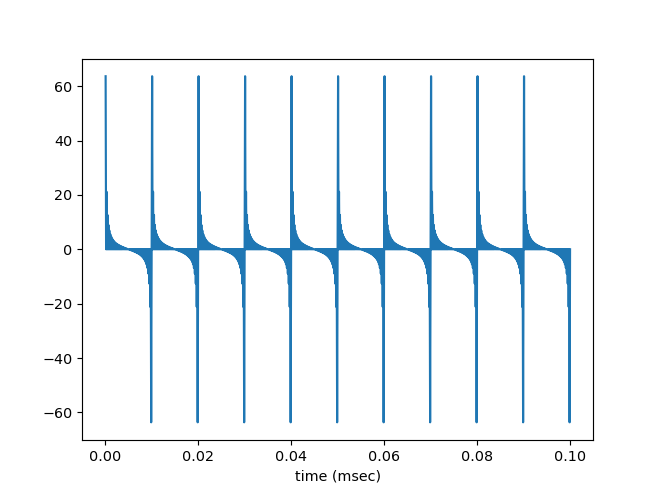

In [50]:
# generate samples, note conversion to float32 array (time은 이미  만들었다고 assume)
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));    
for freq in range(F0, Fend+1, F0):      
    theta = t * 2*np.pi * freq            # theta: time x 2파이 x frequency (위와 동일)
    tmp = amp * np.sin(theta)
    s = s + tmp                           # s = s + amp*np.sin(theta)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]);      # x축은 time / 5000Hz까지 다 더해진 's'값을 y축으로 plotting하는 것
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

- "pulse train"
  - x: time , y: value(energy)
  - 여러 sine waves를 harmonics로 해서 합한 것 (하나의 sine wave보다 더 복잡한 소리) 
  - sr의 반절까지 더한 것
  
   => wave 측면, "wave form"


- "spectrogram"
  - x: time , y: frequency
  - 신호를 'frequency 측면'에서 본 것 
  - 어떤 주파수 성분이 많은지를 보여주는 것(frequency domain)
  - spectrum을 시간축으로 나열해서 보는 것.
  
  
- "spectrum"
  - x: frequency , y: amplitude       
    (x축은 5000Hz까지)
  - 위의 'pulse train'(여러 sine waves를 합한 것)에서 한 slice를 잘랐다고 했을 때, 이 시점에서 어떤 frequency의 성분이 많은지.  
    (어느 '한 순간'에 어떤 성분이 있는지를 보여줌)
 

In [30]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):   # BW: bend w??
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

- 내용은 몰라도 돼. 무엇인지만 알면 됨. 

->function을 만드는 방법 : def라고 적고 function의 이름을 적음. 괄호 안에 내가 쓰고 싶은 '입력'들을 적어줌.

return 부분이 '출력'

In [31]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

resonance라는 함수 쓸 때 첫번째 입력으로 sr/ RG: 산맥의 위치를 적어 놓음,frequency값/BWG:bend w??, 산맥이 얼마나 뚱뚱한지, 뵤족한지, 
산맥의 shape를 결정 , 수가 클수록 뚱뚱한 것.

In [32]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

first fromant를 500Hz에다 만듦

In [33]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

두번째 산맥은 1500에 만듦

In [34]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [35]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

---여기까진 입술이 없는 상태의 소리

In [36]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

입술이 만약 없다면 위의 상태로 나겠지만, 입술이 있기 때문에 소리가 공명되어 크게 나게 됨.

# 3. load wav

In [ ]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# 4. Fourier tranform

In [ ]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# 5. define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# 6. preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);